## Optical Character Recognition

In [1]:
# Import required libraries
%matplotlib inline
import pytesseract
from pytesseract import Output
import numpy as np
import cv2 
import glob
import re
import json
from matplotlib import pyplot as plt

In [2]:
# Read all the images in the folder

image_dir = 'images/' #path
#list of commonly used image format
image_formats = ['png', 'jpg', 'JPEG' 'gif']
# create an empty file list
files = []
# retrieve image paths recursively from image_dir directory
[files.extend(glob.glob(image_dir + '*.' + img)) for img in image_formats]
# Read the images as numpy array and make a list images
images = [cv2.imread(file) for file in files]

In [3]:
# read an image from the directory
print(images[0])
# print dimension
print('Image Dimensions :', images[0].shape)

[[[232 232 232]
  [229 229 229]
  [227 227 227]
  ...
  [224 224 224]
  [227 227 227]
  [230 230 230]]

 [[230 230 230]
  [226 226 226]
  [229 229 229]
  ...
  [232 232 232]
  [229 229 229]
  [227 227 227]]

 [[228 228 228]
  [223 223 223]
  [248 248 248]
  ...
  [255 255 255]
  [244 244 244]
  [224 224 224]]

 ...

 [[227 227 227]
  [221 221 221]
  [247 247 247]
  ...
  [255 255 255]
  [243 243 243]
  [222 222 222]]

 [[229 229 229]
  [224 224 224]
  [244 244 244]
  ...
  [253 253 253]
  [240 240 240]
  [225 225 225]]

 [[231 231 231]
  [228 228 228]
  [224 224 224]
  ...
  [221 221 221]
  [225 225 225]
  [228 228 228]]]
Image Dimensions : (1037, 803, 3)


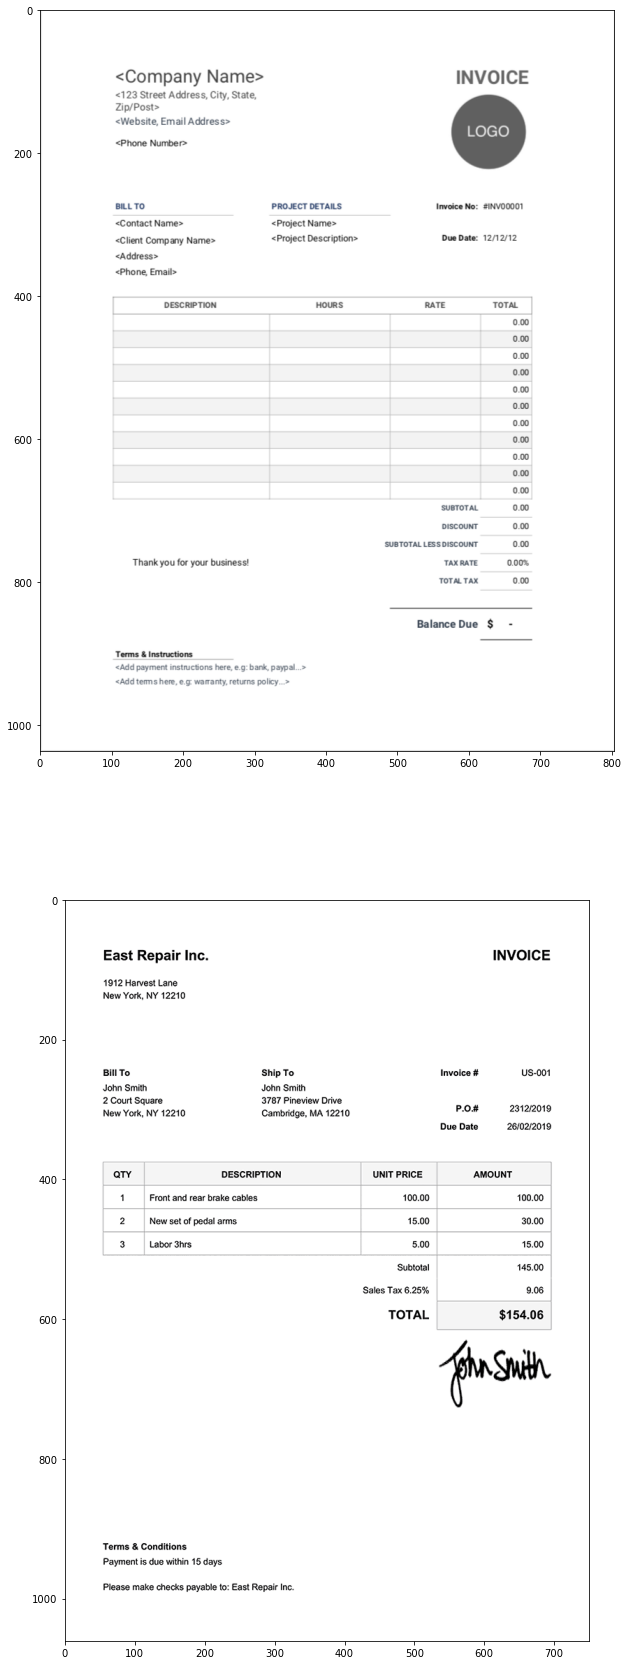

In [4]:
# Plot original images from the directory

# read the image
image1 = cv2.imread(files[0])
#split images into channels
b,g,r = cv2.split(image1)
#merge the individual channels back together
rgb_img = cv2.merge([r,g,b])

# read the image
image2 = cv2.imread(files[1])

plt.figure(1, figsize=(30,30))

plt.subplot(211)
plt.imshow(rgb_img)

plt.subplot(212)
plt.imshow(image2)

plt.show()

In [5]:
# call pytesseract on your machine
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

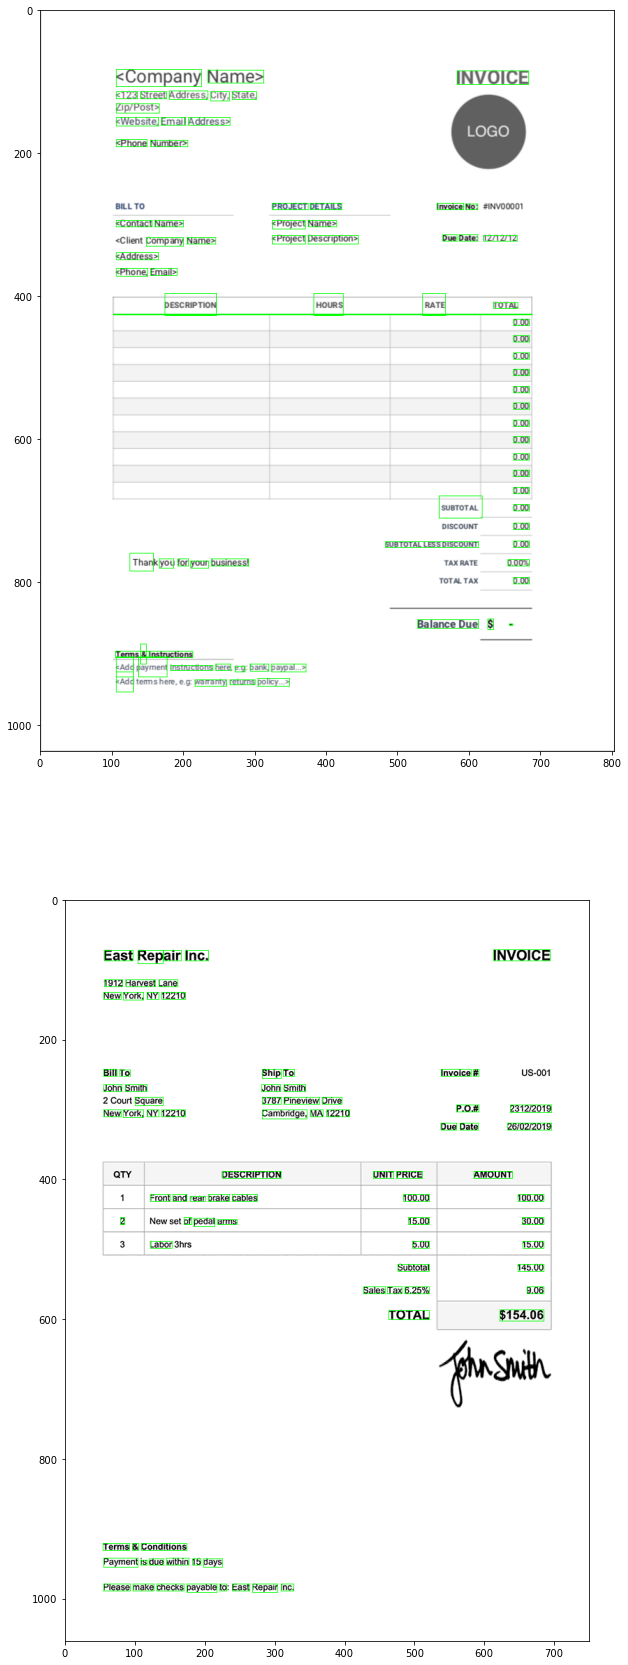

In [6]:
def plot_bounding_boxes(input_image):
    """ 
        Return an image with bounding box around the text with a confidence score > 60%.
    """
    # read the image
    image = cv2.imread(input_image)
    
    # Returns result (a dictionary) containing box boundaries, confidences, and other information
    data_keys = pytesseract.image_to_data(image, output_type=Output.DICT)
    # print('Data Keys: \n', data_keys.keys())
    
    n_boxes = len(data_keys['text'])
    for i in range(n_boxes):
        # bounding box with confidence > 60%
        if int(float(data_keys['conf'][i])) > 60:
            # set coordinate
            (x, y, w, h) = (data_keys['left'][i], data_keys['top'][i], data_keys['width'][i], data_keys['height'][i])
            # Draw the bounding box
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), thickness = 1)
    return image

# Detect each words, and draw their bounding boxes in the images
image1 = plot_bounding_boxes(files[0])
#split images into channels
b,g,r = cv2.split(image1)
#merge the individual channels back together
rgb_img = cv2.merge([r,g,b])

# Detect each words, and draw their bounding boxes in the images
image2 = plot_bounding_boxes(files[1])

# Plot the images with bounding boxs
plt.figure(1, figsize=(30,30))

plt.subplot(211)
plt.imshow(rgb_img)

plt.subplot(212)
plt.imshow(image2)

plt.show()

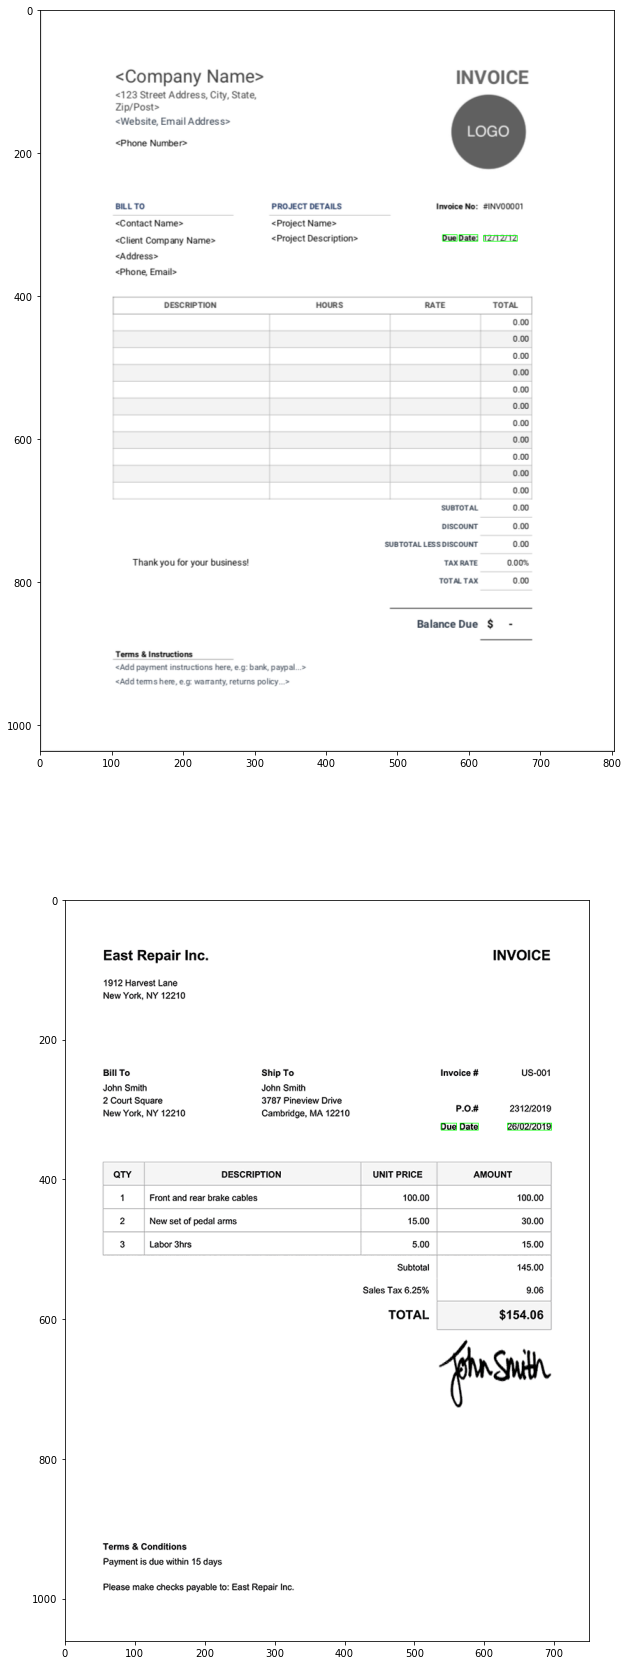

In [7]:
def date_detection(input_image, text_due, text_date, date_format):
    """ 
        Return an image with bounding box around the date text (eg. due date:) and 
        corresponding values text with a confidence score > 60%.
    """
    # read the image
    image = cv2.imread(input_image)

    # Returns result (a dictionary) containing box boundaries, confidences, and other information
    data_keys = pytesseract.image_to_data(image, output_type=Output.DICT)
    # print('Data Keys: \n', data_keys.keys())
    
    n_boxes = len(data_keys['text'])
    for i in range(n_boxes):
        # bounding box with confidence > 60%
        if int(float(data_keys['conf'][i])) > 60:
            if (re.match(date_format, data_keys['text'][i]) or re.match(text_due, data_keys['text'][i]) 
                or (re.match(text_date, data_keys['text'][i]))):
                # set coordinate
                (x, y, w, h) = (data_keys['left'][i], data_keys['top'][i], data_keys['width'][i], data_keys['height'][i])
                # Draw the bounding box
                image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), thickness = 1)
    return image
    n_boxes = len(data_keys['text'])

# regular expression of date format
date_format = '^[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}$'
# regular expression of Due
text_due1 = '^(Due)$'
# regular expression of Date
text_date1 = '^(Date:)$'
# Images with bounding boxes around the date text and corresponding value text
image1 = date_detection(files[0], text_due1, text_date1, date_format)
#split images into channels
b,g,r = cv2.split(image1)
#merge the individual channels back together
rgb_img = cv2.merge([r,g,b])

# Images with bounding boxes around the date text and corresponding value text
text_due2 = '^(Due)$'
text_date2 = '^(Date)$'
image2 = date_detection(files[1], text_due2, text_date2, date_format)

# Plot the images with bounding boxs
plt.figure(1, figsize=(30,30))

plt.subplot(211)
plt.imshow(rgb_img)

plt.subplot(212)
plt.imshow(image2)

plt.show()

In [8]:
def extracting_bounding_box_text(input_image, date_format):
    """ 
        Return extracted text from bounding box text of an image with confidence score > 60%.
    """
    # read the image
    image = cv2.imread(image_dir + input_image) 
    
    # Returns result (a dictionary) containing box boundaries, confidences, and other information
    data_keys = pytesseract.image_to_data(image, output_type=Output.DICT)
    # print('Data Keys: \n', data_keys.keys())
    
    # an empty list for the extracted texts
    extracted_text = []
    n_boxes = len(data_keys['text'])
    for i in range(n_boxes):
        # bounding box with confidence > 60%
        if int(float(data_keys['conf'][i])) > 60:
            # check the regular expression with the desired text
            if re.match(date_format, data_keys['text'][i]):
                # append the text in the extracted_text list
                extracted_text.append(data_keys['text'][i])
                
    return extracted_text[0]

# regular expression of date format
date_format = '^[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}$'

input_image1 = '0001.png' #image name
# extracted text from bounding box text of an image
text1 = extracting_bounding_box_text(input_image1, date_format)

input_image2 = '0002.png' #image name
# extracted text from bounding box text of an image
text2 = extracting_bounding_box_text(input_image2, date_format)

# Make a dictionary, keys are the image names and values are the date value
dic = [{"id":input_image1, "date":text1}, {"id":input_image2, "date":text2}]

# Create the file "Prototype.json", write the contents in dict in json/ dictionary formt and save 
with open('Prototype.json', 'w') as file:
        file.write(json.dumps(dic))
        
#open and read the file
with open('Prototype.json', 'r') as file:
    data = json.load(file)
print(data)

[{'id': '0001.png', 'date': '12/12/12'}, {'id': '0002.png', 'date': '26/02/2019'}]
